In [1]:
# run this to shorten the data import from the files
import os
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [5]:
import pandas as pd

dia = pd.read_csv(path_data+'diabetes.csv').drop('sex', axis=1)
dia.head()

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu,y
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [6]:
# exercise 01

"""
Evaluating distribution fit for the ldl variable

In this exercise, you'll focus on one variable of the diabetes dataset dia: the ldl blood serum. You'll determine whether the normal distribution is a still good choice for ldl based on the additional information provided by a Kolmogorov-Smirnov test.

The dia DataFrame has been loaded for you. The following libraries have also been imported: pandas as pd, numpy as np, and scipy.stats as st.
"""

# Instructions

"""


    Define a list called list_of_dists containing your candidate distributions: Laplace, normal, and exponential (in that order); use the correct names from scipy.stats.
    Inside the loop, fit the data with the corresponding probability distribution, saving as param.
    Perform a Kolmogorov-Smirnov test to evaluate goodness-of-fit, saving the results as result.

"""

# solution

import scipy.stats as st

# List candidate distributions to evaluate
list_of_dists = ['laplace', 'norm', 'expon']
for i in list_of_dists:
    dist = getattr(st, i)
    # Fit the data to the probability distribution
    param = dist.fit(dia['ldl'])
    # Perform the ks test to evaluate goodness-of-fit
    result = st.kstest(dia['ldl'], i, args=param)
    print(result)

#----------------------------------#

# Conclusion

"""
Well done! Both the Laplace and normal distributions have p-values above 0.05. The normal distribution appears to be the best choice for the ldl variable, with a p-value around 0.22!
"""

KstestResult(statistic=0.06416228045269268, pvalue=0.05026538465299435, statistic_location=125.0, statistic_sign=-1)
KstestResult(statistic=0.04977872283458512, pvalue=0.21612589008862504, statistic_location=107.6, statistic_sign=1)
KstestResult(statistic=0.30715826921004363, pvalue=1.6118927860147745e-37, statistic_location=84.2, statistic_sign=-1)


'\nWell done! Both the Laplace and normal distributions have p-values above 0.05. The normal distribution appears to be the best choice for the ldl variable, with a p-value around 0.22!\n'

In [9]:
df_summary = pd.read_csv(path_data+'df_summary.csv')
df_summary.head()

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu,predicted_y
0,30.734961,23.176893,72.232025,188.347619,121.208763,60.229274,3.838757,4.023167,97.188814,79.849956
1,48.994176,22.214556,86.418106,192.107917,125.489870,42.856054,4.708235,4.637421,86.909595,120.824452
2,38.455603,22.637818,84.604477,175.257885,86.062575,53.129163,4.316848,4.720051,77.454820,124.131130
3,46.528683,23.047279,94.612700,216.752438,133.255049,53.660233,3.847524,4.872376,96.836935,136.481736
4,50.218556,27.623288,91.078662,138.528863,92.879230,25.432470,4.858804,4.373770,99.706925,170.991262


In [16]:
df_diffs = pd.read_csv(path_data+'df_diffs.csv')
df_diffs.head()

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,37.426513,119.782279,84.401488,46.782454,40.814843,-72.647261,83.263741,109.417035,73.470489
1,36.544435,114.928850,82.898438,33.142639,24.795651,-76.796024,76.986658,105.685818,77.449178
2,34.836927,118.599618,86.347143,37.160670,33.952468,-77.794906,81.200206,105.112025,82.255428
3,32.782113,117.552810,86.387401,46.270264,36.561728,-79.876780,83.727520,108.248397,78.569511
4,31.030928,112.622061,86.904316,47.388047,35.885353,-71.633663,75.974194,105.961189,73.313734


/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


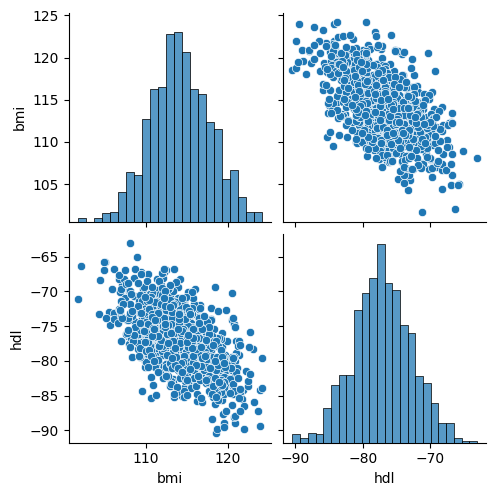

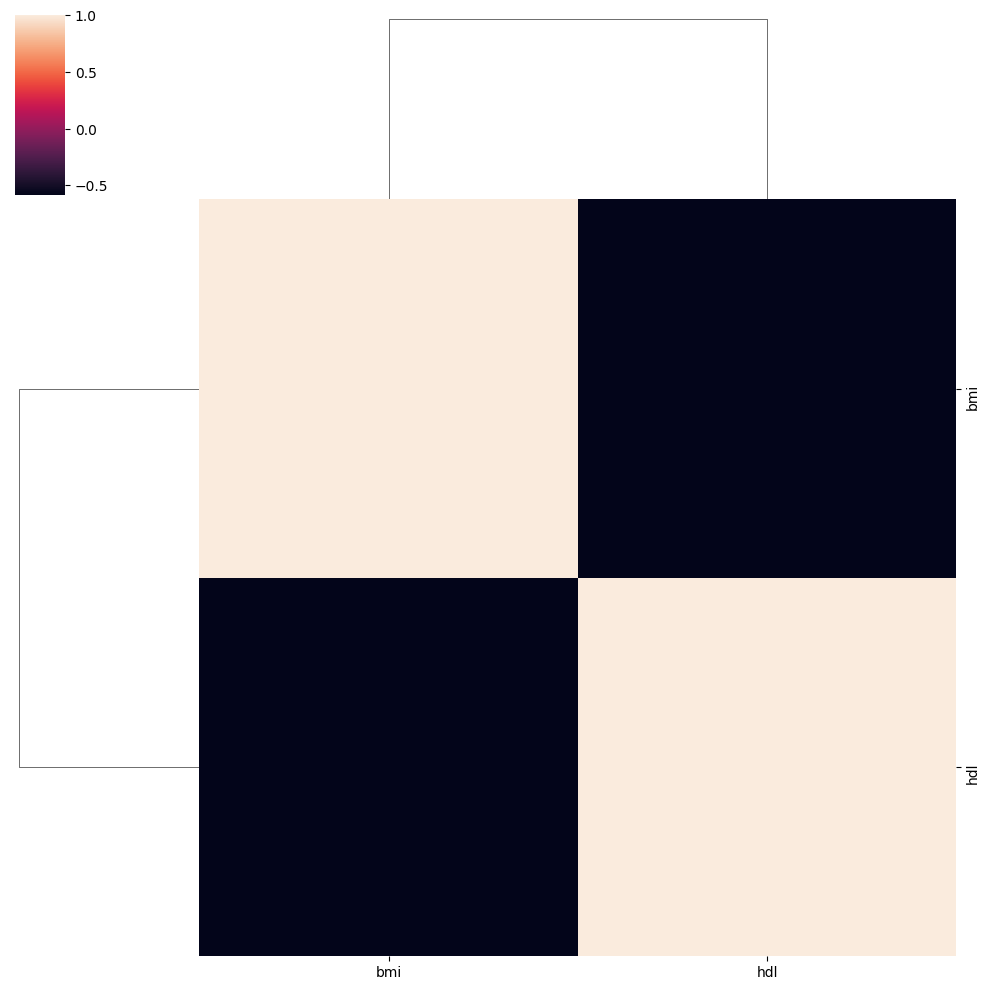

'\nBingo! Using sns.clustermap() should provide a clear picture of the negative correlation between hdl and bmi, which is around -0.5!\n'

In [19]:
# exercise 02

"""
Explore HDL and BMI results

In this exercise, you'll explore simulation results for two variables: bmi and hdl. The simulated results for differences in predicted y values for people in the fourth quantile compared to the first quantile for each predictor (one at a time) have been generated and loaded as df_diffs for you.

The following libraries have been imported: pandas as pd, numpy as np, scipy.stats as st, matplotlib.pyplot as plt, and seaborn as sns. The diabetes dataset, dia, is also loaded.
"""

# Instructions

"""


    Create a pairplot of the bmi and hdl variables (specified in that order) from df_diffs.
---


    Plot a cluster map to examine the correlation of bmi and hdl (specified in that order) from df_diffs.

"""
import matplotlib.pyplot as plt
import seaborn as sns
# solution

# Create a pairplot of bmi and hdl
sns.pairplot(df_diffs[['bmi','hdl']])
plt.show()

#----------------------------------#

# Plot a cluster map of the correlation between bmi and hdl
sns.clustermap(df_diffs[['bmi','hdl']].corr())
plt.show()

#----------------------------------#

# Conclusion

"""
Bingo! Using sns.clustermap() should provide a clear picture of the negative correlation between hdl and bmi, which is around -0.5!
"""

  variable      y_diff
0      bmi  119.782279
1      bmi  114.928850
2      bmi  118.599618
3      bmi  117.552810
4      bmi  112.622061


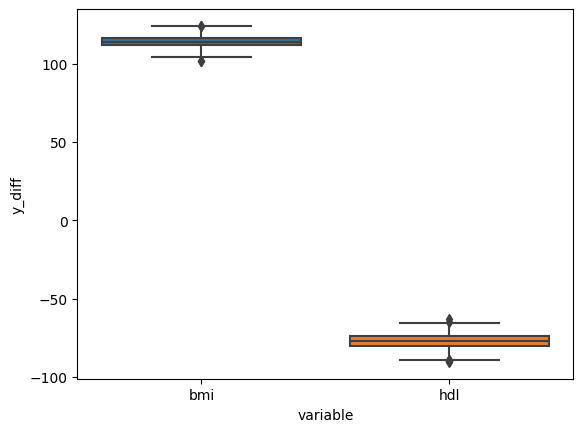

"\nCongrats! You have successfully converted the DataFrame from wide to long, which is then easy to plot using .boxplot(). We can see that high values of hdl and bmi lead to different directions in the changes for the predicted y values of disease progression. In the next lesson, we'll use sensitivity analysis to fully examine the impact of increasing or decreasing these two values on the predicted y values!\n"

In [20]:
# exercise 03

"""
Exploring with box plots

Two common formats of DataFrames are the wide format and long format. The wide format shows different variables represented in different columns, while the long format displays different variables represented by two columns together (one for the variable name and the other for the corresponding values).

Long versions of DataFrames can be useful for easily creating different visualizations, including the boxplot that you will create in this exercise after converting df_diffs (loaded for you) from wide to long format.

pandas has been loaded for you as pd, matplotlib.pyplot as plt, and Seaborn as sns.
"""

# Instructions

"""


    Convert the bmi and hdl columns (specified in that order) of the df_diffs DataFrame from wide to long format; save the long DataFrame as hdl_bmi_long and name the column that will contain the variable values y_diff.
    Use a boxplot to visualize the results of patients in the first or last quartile of the hdl and bmi variables.

"""

# solution

# Convert the hdl and bmi columns of df_diffs from wide to long format, naming the values column "y_diff"
hdl_bmi_long = df_diffs.melt(value_name='y_diff', value_vars=['bmi','hdl'])
print(hdl_bmi_long.head())

# Use a boxplot to visualize the results
sns.boxplot(x='variable', y='y_diff', data=hdl_bmi_long)
plt.show()

#----------------------------------#

# Conclusion

"""
Congrats! You have successfully converted the DataFrame from wide to long, which is then easy to plot using .boxplot(). We can see that high values of hdl and bmi lead to different directions in the changes for the predicted y values of disease progression. In the next lesson, we'll use sensitivity analysis to fully examine the impact of increasing or decreasing these two values on the predicted y values!
"""

In [23]:
def profit_next_year_mc(mean_inflation, mean_volume, n):
  profits = []
  for i in range(n):
    # Generate inputs by sampling from the multivariate normal distribution
    rate_sales_volume = st.multivariate_normal.rvs(mean=[mean_inflation,mean_volume], cov=cov_matrix,size=1000)
    # Deterministic calculation of company profit
    price = 100 * (100 + rate_sales_volume[:,0])/100
    volume = rate_sales_volume[:,1]
    loan_and_cost = 50 * volume + 45 * (100 + 3 * rate_sales_volume[:,0]) * (volume/100)
    profit = (np.mean(price * volume - loan_and_cost))
    profits.append(profit)
  return profits

cov_matrix = np.array([[11. , -9.8],[-9.8, 11. ]])

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


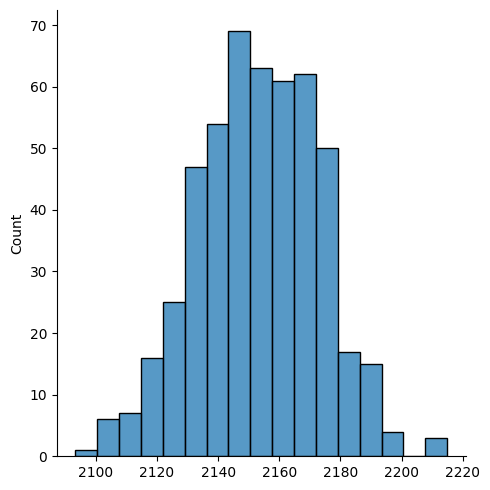

'\nGreat! Now that you have successfully performed the simulation, you can see that with a mean inflation of 2% and a mean sales volume of 500, the expected profit next year is about $2,150,000!\n'

In [24]:
# exercise 04

"""
Simulation of a profit problem

You work for a company that manufactures industrial equipment. The sales price of each piece of equipment is $100,000. You also know that there is a strong negative correlation between the inflation_rate and sales volume. This relationship is captured by the covariance matrix cov_matrix, which is available in the console for you.

The function profit_next_year_mc() performs a Monte Carlo simulation returning expected profit (in thousands of dollars), given the mean inflation rate and mean sales volume as arguments. You'll also need to pass n, the number of time the simulation should be run. The function has been loaded for you, and the definition is below.

def profit_next_year_mc(mean_inflation, mean_volume, n):
  profits = []
  for i in range(n):
    # Generate inputs by sampling from the multivariate normal distribution
    rate_sales_volume = st.multivariate_normal.rvs(mean=[mean_inflation,mean_volume], cov=cov_matrix,size=1000)
    # Deterministic calculation of company profit
    price = 100 * (100 + rate_sales_volume[:,0])/100
    volume = rate_sales_volume[:,1]
    loan_and_cost = 50 * volume + 45 * (100 + 3 * rate_sales_volume[:,0]) * (volume/100)
    profit = (np.mean(price * volume - loan_and_cost))
    profits.append(profit)
  return profits

The following packages have been imported for you: pandas as pd, numpy as np, scipy.stats as st, matplotlib.pyplot as plt, and seaborn as sns.
"""

# Instructions

"""


    Perform a Monte Carlo simulation by running profit_next_year_mc() 500 times using a mean_inflation of 2 and a mean_volume of 500.
    Visualize the simulation results using a displot.

"""

# solution

# Run a Monte Carlo simulation 500 times using a mean_inflation of 2 and a mean_volume of 500
profits = profit_next_year_mc(2,500,500)

# Create a displot of the results
sns.displot(profits)
plt.show()

#----------------------------------#

# Conclusion

"""
Great! Now that you have successfully performed the simulation, you can see that with a mean inflation of 2% and a mean sales volume of 500, the expected profit next year is about $2,150,000!
"""

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


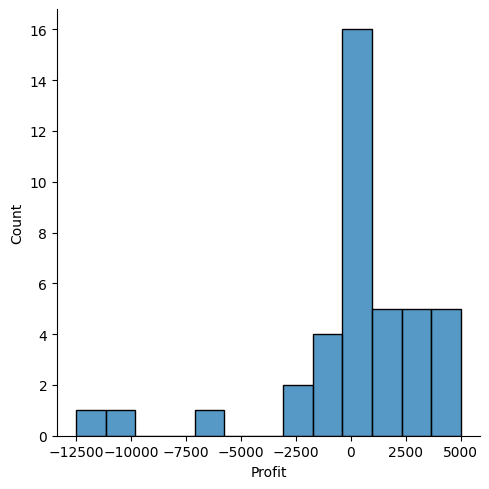

"\nNice work! You can see that there is a wide range of possible values for profits, which is expected due to the wide range of input inflation rates and volumes. You might have noticed that there are also negative values for profits, indicating a loss for the company. Let's use the hexbin plot to perform sensitivity analysis!\n"

In [25]:
# exercise 05

"""
Company sensitivity analysis

You'll now examine what would happen to profits for the company from the previous exercise at a variety of mean_inflation and mean_volume values. This will help the company plan for several levels of inflation and sales volumes since no company can ever be certain what inflation or sales volumes they will have in the future.

The mean inflation percentages you'd like to explore are 0, 1, 2, 5, 10, 15, 20, 50, while the sales values for use as the mean volume value are 100, 200, 500, 800, 1000. As a reminder, here is the profit_next_year_mc() function definition, which has already been loaded for you.

def profit_next_year_mc(mean_inflation, mean_volume, n):
  profits = []
  for i in range(n):
    # Generate inputs by sampling from the multivariate normal distribution
    rate_sales_volume = st.multivariate_normal.rvs(mean=[mean_inflation,mean_volume], cov=cov_matrix,size=1000)
    # Deterministic calculation of company profit
    price = 100 * (100 + rate_sales_volume[:,0])/100
    volume = rate_sales_volume[:,1]
    loan_and_cost = 50 * volume + 45 * (100 + 3 * rate_sales_volume[:,0]) * (volume/100)
    profit = (np.mean(price * volume - loan_and_cost))
    profits.append(profit)
  return profits

The following packages have been imported: pandas as pd, numpy as np, scipy.stats as st, matplotlib.pyplot as plt, and seaborn as sns.
"""

# Instructions

"""


    Complete the Monte Carlo simulation by running profit_next_year_mc() to calculate profit 100 times, each time looping through the list of infl values and the list of vol values.
    Use a displot to visualize the simulation results saved in the Profit column of the resulting DataFrame.

"""

# solution

x1 = []
x2 = []
y = []
for infl in [0, 1, 2, 5, 10, 15, 20, 50]:
    for vol in [100, 200, 500, 800, 1000]:
		# Run profit_next_year_mc so that it samples 100 times for each infl and vol combination
        avg_prof = np.mean(profit_next_year_mc(infl, vol, 100))
        x1.append(infl)
        x2.append(vol)
        y.append(avg_prof)
df_sa = pd.concat([pd.Series(x1), pd.Series(x2), pd.Series(y)], axis=1)
df_sa.columns = ["Inflation", "Volume", "Profit"]
# Create a displot of the simulation results for "Profit"
sns.displot(df_sa['Profit'])
plt.show()

#----------------------------------#

# Conclusion

"""
Nice work! You can see that there is a wide range of possible values for profits, which is expected due to the wide range of input inflation rates and volumes. You might have noticed that there are also negative values for profits, indicating a loss for the company. Let's use the hexbin plot to perform sensitivity analysis!
"""

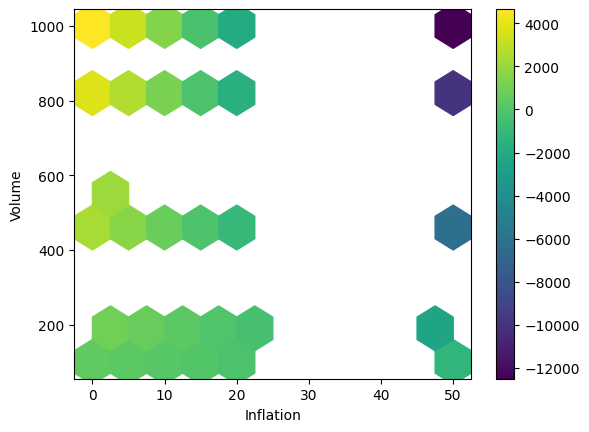

'\nCongrats! You have successfully performed a sensitivity analysis! With increasing inflation, given the same sales volume, the simulated profits will decrease. Given the same inflation rate at a lower value, with increasing volumes, the profits will increase. However, profits will decrease with high inflation over 10%, even given increasing volumes.\n'

In [26]:
# exercise 06

"""
Sensitivity analysis using hexbin plot

The simulation results you generated in the previous exercise are saved in the DataFrame df_sa which has been loaded for you.

Recall that df_sa has three columns: Inflation contains the mean inflation rates used in the simulations, Volume contains the mean sales volumes used in the simulations, and Profit contains forecasted profits based on your simulation.

You'll now use a hexbin plot to perform sensitivity analysis and understand the impact of these parameters!

The following libraries have been imported for you: pandas as pd, numpy as np, scipy.stats as st, and matplotlib.pyplot as plt.
"""

# Instructions

"""


    Complete the hexbin plot code to visualize the sensitivity analysis results; use Inflation as the x-axis, Volume as the y-axis, and the mean values of Profits as the basis for the color of the hexbins.

"""

# solution

# Complete the hexbin to visualize sensitivity analysis results
df_sa.plot.hexbin(x='Inflation',
     y='Volume',
     C='Profit',
     reduce_C_function=np.mean,
     gridsize=10,
     cmap="viridis",
     sharex=False)
plt.show()

#----------------------------------#

# Conclusion

"""
Congrats! You have successfully performed a sensitivity analysis! With increasing inflation, given the same sales volume, the simulated profits will decrease. Given the same inflation rate at a lower value, with increasing volumes, the profits will increase. However, profits will decrease with high inflation over 10%, even given increasing volumes.
"""